# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt

## ImageAnalysis3 and basic modules

In [2]:
# Pu's ImageAnalysis3
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib inline

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast


28984


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'method_overview')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\method_overview\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\method_overview\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=_dpi/2, dpi_save=_dpi, frameon=False, 
                              figsize=(_page_width/2, _page_width/2), fontsize=_font_size, facecolor='white', transparent=True)
sc.settings.figdir = output_figure_folder

# Plot figures for cell type correspondence table

## load result

Celltype correspondence table can be generated by the jupyter notebook from relative path below:

[1_1_rna_merfish_merged_mop_celltype_correspondence](1_1_rna_merfish_merged_mop_celltype_correspondence.ipynb)

In [7]:
celltype_prediction_fname = os.path.join(output_analysis_folder, 'MOp_celltype_prediction.csv')

overwrite_prediction=False
if not overwrite_prediction and os.path.exists(celltype_prediction_fname):
    print ('Load saved prediction result.')
    fractions_sorted = pd.read_csv(celltype_prediction_fname, index_col=0)
else:
    print ('Save prediction result.')
    fractions_sorted.to_csv(celltype_prediction_fname)
    
fractions_sorted.head()

Load saved prediction result.


,Astro,Endo,L2/3 IT,L4/5 IT,L5 ET,Lamp5,PVM,L5 IT,Vip,L6b,...,Oligo,Sst,Pvalb,SMC,L6 IT Car3,Sncg,L6 IT,VLMC,L5/6 NP,L6 CT
subclass_manual_label,,,,,,,,,,,,,,,,,,,,,
Astro,0.860497,0.008342,0.010042,0.014985,0.001545,0.004171,0.000154,0.015449,0.003399,0.005407,...,0.004635,0.008651,0.002935,0.000927,0.000618,0.000309,0.010969,0.010814,0.003090,0.003090
Endo,0.005415,0.849469,0.002382,0.001733,0.001516,0.001083,0.047217,0.001733,0.000433,0.000000,...,0.003249,0.001083,0.000433,0.033572,0.000000,0.000000,0.000866,0.011046,0.000433,0.000000
L2/3 IT,0.000829,0.001491,0.917316,0.065120,0.000829,0.001326,0.000000,0.004143,0.001160,0.000166,...,0.000166,0.000331,0.000000,0.000000,0.000000,0.000166,0.003977,0.000000,0.000994,0.000166
L4/5 IT,0.000000,0.000711,0.056201,0.933839,0.000237,0.000474,0.000000,0.003794,0.000000,0.000000,...,0.000237,0.000711,0.000949,0.000000,0.000000,0.000000,0.002134,0.000000,0.000000,0.000000
L5 ET,0.033473,0.001141,0.002663,0.000761,0.916698,0.001902,0.000000,0.001521,0.000380,0.000000,...,0.019399,0.001521,0.001902,0.000000,0.000000,0.000000,0.001141,0.000380,0.001902,0.000761


In [8]:
fractions_sorted.columns

Index(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'Lamp5', 'PVM', 'L5 IT',
       'Vip', 'L6b', 'other', 'Micro', 'Peri', 'OPC', 'Oligo', 'Sst', 'Pvalb',
       'SMC', 'L6 IT Car3', 'Sncg', 'L6 IT', 'VLMC', 'L5/6 NP', 'L6 CT'],
      dtype='object')

## define functions

In [9]:
# Sorting code from Xingjie adapted from Meng
from random import choice

def permuteOrder(df,axis,switch = 0):
    penaltyMat = np.zeros((df.shape[0],df.shape[1]))
    for i in range(penaltyMat.shape[0]):
        for j in range(penaltyMat.shape[1]):
            penaltyMat[i,j] = np.abs(i-(df.shape[0])/(df.shape[1])*j)**0.5
    if axis == 0:
        sort = df.index.values.copy()
    elif axis == 1:
        sort = df.columns.values.copy()
    dfCopy = df.values.copy()
#     print(dfCopy)
    for i in range(df.shape[int(axis)]):
        penalty = np.full((df.shape[int(axis)]),np.inf)
        for j in range(len(penalty)):
            tempMat = dfCopy.copy()
            if axis == 0:
                tempMat[[i, j],:] = tempMat[[j, i],:]
            elif axis == 1:
                tempMat[:,[i, j]] = tempMat[:,[j, i]]
            penalty[j] = sum(sum(tempMat*penaltyMat))
        idx = np.argmin(penalty)
        if not idx == i:                
            switch += 1
        if axis == 0:
            dfCopy[[i, idx], :] = dfCopy[[idx, i], :];
        elif axis == 1:
            dfCopy[:,[i, idx]] = dfCopy[:,[idx, i]];
        else:
            print('bad axis {}'.format(axis))
        sort[[i, idx]] = sort[[idx, i]]
    return switch,sort

def runPermutation(df, axis = 'Both', maxIter = 100,maxTrys = 9):  # initial maxTrys = 5
    iterations = 0
    trys = 0
    sortedDF = df.copy(deep=True)
    while iterations < maxIter:
        if axis == 'Both':
            switch,rowSort = permuteOrder(sortedDF,0)
            sortedDF = sortedDF.loc[rowSort,:].copy(deep=True)
            switch,columnSort = permuteOrder(sortedDF,1,switch)
            sortedDF = sortedDF.loc[:,columnSort].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentIndex = np.array(range(len(sortedDF.index.values)))
                currentCol = np.array(range(len(sortedDF.columns.values)))
                in1 = choice(currentIndex)
                in2 = choice(currentIndex)
                if len(currentIndex)>1:
                    while in1 == in2:
                        in2 = choice(currentIndex)
                currentIndex[[in1,in2]] = currentIndex[[in2,in1]]
                in1 = choice(currentCol)
                in2 = choice(currentCol)
                if len(currentCol)>1:
                    while in1 == in2:
                        in2 = choice(currentCol)
                currentCol[[in1,in2]] = currentCol[[in2,in1]]
                sortedDF = sortedDF.iloc[currentIndex,currentCol].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                iterations = maxIter
        if axis == 'Rows':
            switch,rowSort = permuteOrder(sortedDF,0)
            sortedDF = sortedDF.loc[rowSort,:].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentIndex = np.array(range(len(sortedDF.index.values)))
                in1 = choice(currentIndex)
                in2 = choice(currentIndex)
                if len(currentIndex)>1:
                    while in1 == in2:
                        in2 = choice(currentIndex)
                currentIndex[[in1,in2]] = currentIndex[[in2,in1]]
                sortedDF = sortedDF.iloc[currentIndex,:].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                 iterations = maxIter
        if axis == 'Columns':
            switch,columnSort = permuteOrder(sortedDF,1)
            sortedDF = sortedDF.loc[:,columnSort].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentCol = np.array(range(len(sortedDF.columns.values)))
                in1 = choice(currentCol)
                in2 = choice(currentCol)
                if len(currentCol)>1:
                    while in1 == in2:
                        in2 = choice(currentCol)
                currentCol[[in1,in2]] = currentCol[[in2,in1]]
                sortedDF = sortedDF.iloc[:,currentCol].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                iterations = maxIter
    return sortedDF, sortedDF.index, sortedDF.columns

## plot figures

In [10]:
# re-order the celltypes
sorted_predicted_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro',
                           'Endo',
                           'VLMC','SMC','Peri', 
                           'PVM',
                           'other',
                          ]

sorted_identified_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro',
                           'Endo',
                           'VLMC','SMC','Peri', 
                           #'PVM',
                           'other',
                          ]


fractions_sorted_by_label = fractions_sorted[sorted_predicted_labels]
fractions_sorted_new, rows, columns = runPermutation(fractions_sorted_by_label,'Rows',maxIter = 100,maxTrys = 15)
#fractions_sorted, rows, columns = runPermutation(fractions_sorted,'Rows',maxIter = 100,maxTrys = 15)

fractions_sorted_new = fractions_sorted_new.reindex(sorted_identified_labels)

meta NOT subset; don't know how to subset; dropped


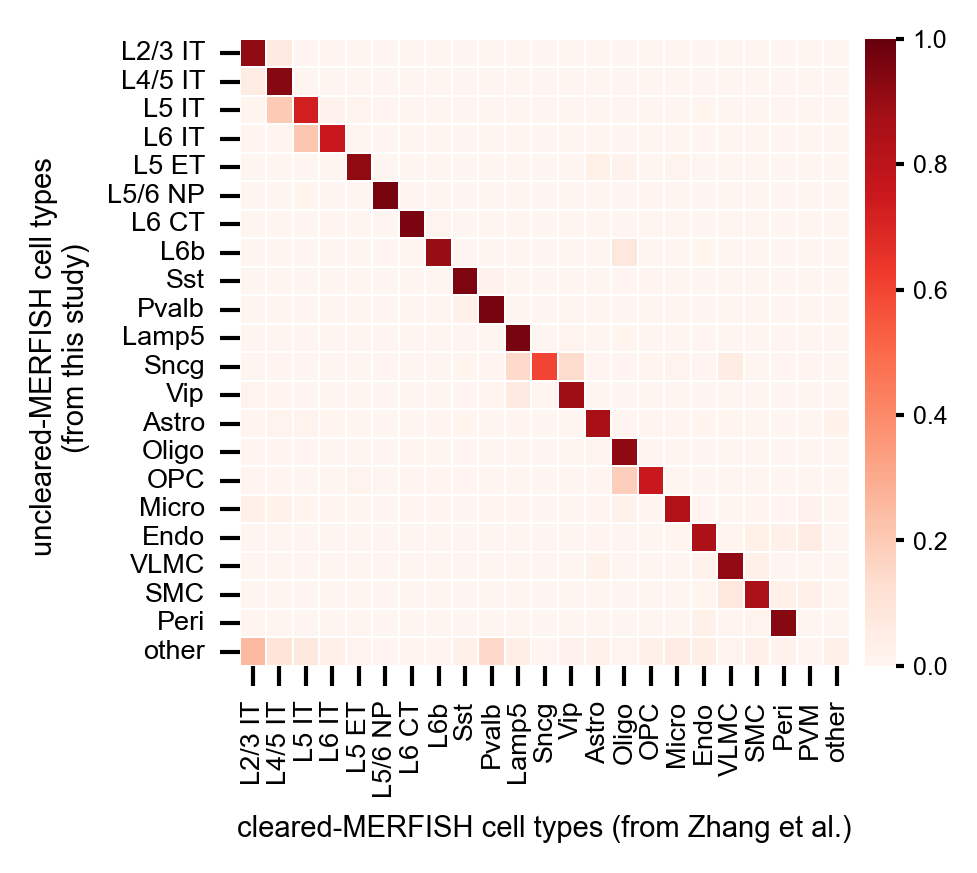

In [11]:
# Plot
fig, ax = plt.subplots(figsize = (_page_width/1.75,_page_width/2), dpi=150)
#plt.style.use('default')


#sns.set(font_scale=0.2)

ax = sns.heatmap(fractions_sorted_new, cmap='Reds', vmin=0, vmax=1, cbar=True, 
                 xticklabels=True, yticklabels=True, 
                 linewidths=.075,cbar_kws={"shrink": 1, 'pad':0.02})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=_font_size-1)
ax.figure.axes[-1].tick_params(axis='both', length=2, pad=2)

plt.tick_params(axis='x', labelsize=_font_size-0.5)
plt.tick_params(axis='y', labelsize=_font_size-0.5)   
plt.xticks(rotation = 90)
plt.yticks(rotation = 'horizontal')
#plt.xlabel(ref_cluster_column, size=12) 
#plt.ylabel(check_query_cluster_column, size=12)

plt.xlabel('cleared-MERFISH cell types (from Zhang et al.)', size=_font_size) 
plt.ylabel('uncleared-MERFISH cell types \n (from this study)', size=_font_size)

plt.savefig(os.path.join(output_figure_folder, 'MOp_celltype_prediction.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')
plt.show()